https://towardsdatascience.com/how-to-perform-lasso-and-ridge-regression-in-python-3b3b75541ad8

Question1: What is the difference between Supervised and Unsupervised Machine
Learning Algorithms?

Supervised Learning:<br>
This is a type of machine learning  where the data is provided with the resultant column,where the algorithm tries to identify the pattern between the dependent and independent columns.From the name it can be understood that ,the result is already provided and the system tries to detect the pattern.<br>
It can be used for classification or regression.Some of the supervised machine learning algorithms are Linear Regression,Logistic Regression,Random Forest,Decision Trees etc.

Unsupervised Algorithm:<br>
This type of machine learning no target variable is provided with the data,the algorithm tries to cluster the data or to find the association.<br>
It can be used to cluster the data point or to find out the asscoiation rule mining oe to understand the distribution of the data.Some of the unsupervised machine learning algorithms are Kmeans clustering,apriori.
    

Question2:
Apply Linear Regression model to Boston Housing Dataset. Assume “MEDV” as
Target variable. Return the R² score and the intercept value of your model.

Load the required Libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

Load the data

In [2]:
%%time
data=pd.read_csv("Boston.csv")

Wall time: 213 ms


In [3]:
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [5]:
data=data.drop("Unnamed: 0",1)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Load dependent columns and independent columns in separate variables

In [6]:
x=data.loc[:,data.columns!='medv']
y=data.loc[:,data.columns=='medv']

Use linear regression to find Intercepts and R2 values .

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1) 
reg=LinearRegression() 
reg.fit(x_train,y_train)
print("Intercept:",reg.intercept_)
print('Coefficients:',reg.coef_) 
pred=reg.predict(x_test)
print("R2 score:",r2_score(pred,y_test))

Intercept: [ 33.79211251]
Coefficients: [[ -8.95714048e-02   6.73132853e-02   5.04649248e-02   2.18579583e+00
   -1.72053975e+01   3.63606995e+00   2.05579939e-03  -1.36602886e+00
    2.89576718e-01  -1.22700072e-02  -8.34881849e-01   9.40360790e-03
   -5.04008320e-01]]
R2 score: 0.539932839922


Plot the distribution of the target variable MEDV

C:\Users\Sam Jones\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


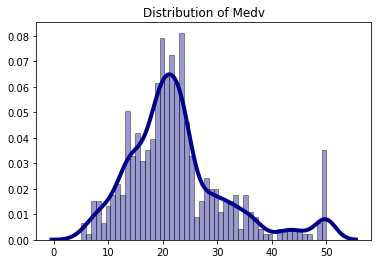

In [8]:
sns.distplot(y, hist=True,kde=True,bins=50, color = 'darkblue', hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4}).set_title("Distribution of Medv")
plt.show()

The distribution of medv variable is symmetric with slight high frequency on value 50.

Use the heatmap function from the seaborn library to plot the correlation matrix. What
are the most correlated variables?

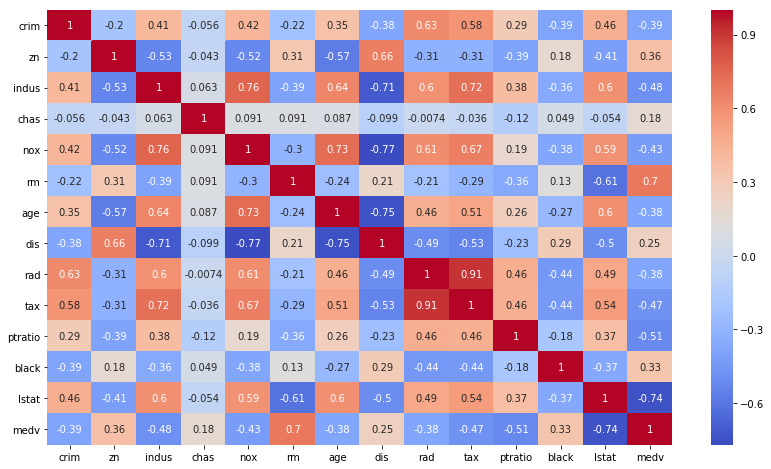

In [9]:
plt.figure(figsize=(14,8))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

From the correlation heatmap ,feature rm is 70%positivewly correlated and Istat is 74% negatively correlated with the resultant feature.